In [37]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
import random
import os
import fastai
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

use_cuda = torch.cuda.is_available()

root = './data'
if not os.path.exists(root):
    os.mkdir(root)


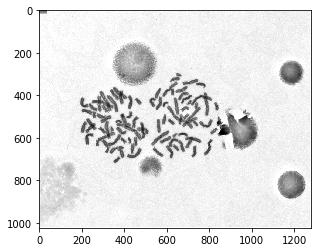

In [6]:
plt.imshow(img)

In [140]:
import os
imagePath = r'C:\Users\lhuashen\Desktop\forStudents'
image_paths = [os.path.join(imagePath,'in',i) for i in os.listdir(imagePath+'\in')]
target_paths =[os.path.join(imagePath,'out',i) for i in os.listdir(imagePath+'\out')]
inputIdx = os.listdir(imagePath+'\out')
print(inputIdx)

['HTDCAD#4_0.1Gy(1)_1~A.1.TIF', 'HTDCAD#4_0.1Gy(1)_1~A.10.TIF', 'HTDCAD#4_0.1Gy(1)_1~A.11.TIF', 'HTDCAD#4_0.1Gy(1)_1~A.12.TIF', 'HTDCAD#4_0.1Gy(1)_1~A.13.TIF', 'HTDCAD#4_0.1Gy(1)_1~A.14.TIF', 'HTDCAD#4_0.1Gy(1)_1~A.15.TIF', 'HTDCAD#4_0.1Gy(1)_1~A.16.TIF', 'HTDCAD#4_0.1Gy(1)_1~A.17.TIF', 'HTDCAD#4_0.1Gy(1)_1~A.18.TIF', 'HTDCAD#4_0.1Gy(1)_1~A.19.TIF', 'HTDCAD#4_0.1Gy(1)_1~A.2.TIF', 'HTDCAD#4_0.1Gy(1)_1~A.20.TIF', 'HTDCAD#4_0.1Gy(1)_1~A.21.TIF', 'HTDCAD#4_0.1Gy(1)_1~A.22.TIF', 'HTDCAD#4_0.1Gy(1)_1~A.23.TIF', 'HTDCAD#4_0.1Gy(1)_1~A.24.TIF', 'HTDCAD#4_0.1Gy(1)_1~A.25.TIF', 'HTDCAD#4_0.1Gy(1)_1~A.26.TIF', 'HTDCAD#4_0.1Gy(1)_1~A.27.TIF', 'HTDCAD#4_0.1Gy(1)_1~A.3.TIF', 'HTDCAD#4_0.1Gy(1)_1~A.30.TIF', 'HTDCAD#4_0.1Gy(1)_1~A.31.TIF', 'HTDCAD#4_0.1Gy(1)_1~A.4.TIF', 'HTDCAD#4_0.1Gy(1)_1~A.5.TIF', 'HTDCAD#4_0.1Gy(1)_1~A.6.TIF', 'HTDCAD#4_0.1Gy(1)_1~A.7.TIF', 'HTDCAD#4_0.1Gy(1)_1~A.8.TIF', 'HTDCAD#4_0.1Gy(1)_1~A.9.TIF']


In [158]:
import re
inputIdx = [i[(i.find('~B')+3):i.find('.TIF')] for i in os.listdir(imagePath+'\in')]
outputIdx = [i[(i.find('~A')+3):i.find('.TIF')] for i in os.listdir(imagePath+'\out')]

missingOut = list(set(inputIdx) - set(outputIdx))
missingIn = list(set(outputIdx)-set(inputIdx))

image_paths = [i for i in image_paths if i[(i.find('~B')+3):i.find('.TIF')] not in missingOut ]
target_paths = [i for i in target_paths if i[(i.find('~A')+3):i.find('.TIF')] not in missingIn ]
print('size of input is ' + str(len(image_paths)) + ' and size of output is ' + str(len(target_paths)) )

size of input is 29 and size of output is 29


In [133]:
# img = Image.open(target_paths[0])
print(img.size)
plt.imshow(img)

SyntaxError: invalid syntax (<ipython-input-133-6faa070acb83>, line 2)

In [225]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, image_paths, target_paths, train=True):
        self.image_paths = image_paths
        self.target_paths = target_paths

    def transform(self, image, mask):
        # Resize
        resize = transforms.Resize(size=(1280, 1024))
        image = resize(image)
        mask = resize(mask)

        # Random crop
        i, j, h, w = transforms.RandomCrop.get_params(
            image, output_size=(224, 224))
        image = TF.crop(image, i, j, h, w)
        mask = TF.crop(mask, i, j, h, w)


        # Random horizontal flipping
        if random.random() > 0.5:
            image = TF.hflip(image)
            mask = TF.hflip(mask)

        # Random vertical flipping
        if random.random() > 0.5:
            image = TF.vflip(image)
            mask = TF.vflip(mask)

        # Transform to tensor
        image = np.expand_dims(np.array(image),axis=-1)
        image = np.repeat(image,repeats=3,axis=2)
        image = TF.to_tensor(image)
        mask = TF.to_tensor(mask)
        return image, mask

    def __getitem__(self, index):
        image = Image.open(self.image_paths[index])
        mask = Image.open(self.target_paths[index])
        x, y = self.transform(image, mask)
        return x, y

    def __len__(self):
        return len(self.image_paths)

29
(3, 224, 224)


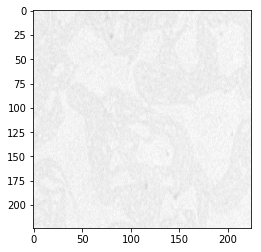

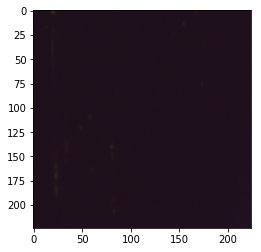

In [238]:
a = MyDataset(image_paths,target_paths=target_paths)
print(len(target_paths))
x,y = a.__getitem__(1)
plt.figure()
print(x.numpy().shape)
plt.imshow(np.rollaxis(x.numpy(),0,3))
plt.figure()
plt.imshow(np.rollaxis(y.numpy(),0,3))

In [227]:
??transforms.Normalize

In [228]:
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])
# if not exist, download mnist dataset
train_set = torch.utils.data.DataLoader(dataset=MyDataset(image_paths,target_paths=target_paths),batch_size=4)

4


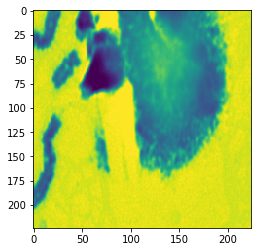

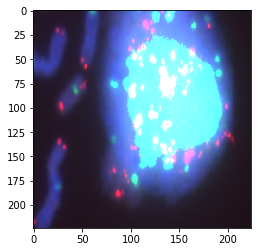

In [229]:
a = next(train_set.__iter__())
print(len(a[0].shape))
plt.figure()
plt.imshow(a[0][0].numpy()[0])
plt.figure()
plt.imshow(np.rollaxis(a[1][0].numpy(),0,3))

In [240]:
a=[0,1,2,3,4,5]
a[0:3]

[0, 1, 2]

In [272]:
import torch.nn as nn
from torchvision import models

def convrelu(in_channels, out_channels, kernel, padding):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel, padding=padding),
        nn.ReLU(inplace=True),
    )

class ResNetUNet(nn.Module):

    def __init__(self, n_class):
        super().__init__()

        # Use ResNet18 as the encoder with the pretrained weights
        self.base_model = models.resnet18(pretrained=True)
        self.base_layers = list(self.base_model.children())

        self.layer0 = nn.Sequential(*self.base_layers[:3]) # size=(N, 64, x.H/2, x.W/2)
        self.layer0_1x1 = convrelu(64, 64, 1, 0)
        self.layer1 = nn.Sequential(*self.base_layers[3:5]) # size=(N, 256, x.H/4, x.W/4)
        self.layer1_1x1 = convrelu(64, 64, 1, 0)
        self.layer2 = self.base_layers[5]  # size=(N, 512, x.H/8, x.W/8)
        self.layer2_1x1 = convrelu(128, 128, 1, 0)
        self.layer3 = self.base_layers[6]  # size=(N, 1024, x.H/16, x.W/16)
        self.layer3_1x1 = convrelu(256, 128, 1, 0)
        self.layer4 = self.base_layers[7]  # size=(N, 2048, x.H/32, x.W/32)
        self.layer4_1x1 = convrelu(512, 256, 1, 0)

        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)

        self.conv_up3 = convrelu(256 + 128, 256, 3, 1)
        self.conv_up2 = convrelu(256 + 128, 128,3, 1)
        self.conv_up1 = convrelu(128 + 64, 128, 3, 1)
        self.conv_up0 = convrelu(128 + 64, 128, 3, 1)

        self.conv_original_size0 = convrelu(3, 64, 3, 1)
        self.conv_original_size1 = convrelu(64, 64, 3, 1)
        self.conv_original_size2 = convrelu(64 + 128, 64, 3, 1)

        self.conv_last = nn.Conv2d(64, n_class, 1)

    def forward(self, input):
        x_original = self.conv_original_size0(input)
        x_original = self.conv_original_size1(x_original)

        layer0 = self.layer0(input)
        layer1 = self.layer1(layer0)
        layer2 = self.layer2(layer1)
        layer3 = self.layer3(layer2)
        layer4 = self.layer4(layer3)

        # Upsample the last/bottom layer
        layer4 = self.layer4_1x1(layer4)
        x = self.upsample(layer4)
        # Create the shortcut from the encoder
        layer3 = self.layer3_1x1(layer3)
        x = torch.cat([x, layer3], dim=1)
        x = self.conv_up3(x)

        x = self.upsample(x)
        layer2 = self.layer2_1x1(layer2)
        x = torch.cat([x, layer2], dim=1)
        x = self.conv_up2(x)

        x = self.upsample(x)
        layer1 = self.layer1_1x1(layer1)
        x = torch.cat([x, layer1], dim=1)
        x = self.conv_up1(x)

        x = self.upsample(x)
        layer0 = self.layer0_1x1(layer0)
        x = torch.cat([x, layer0], dim=1)
        x = self.conv_up0(x)

        x = self.upsample(x)
        x = torch.cat([x, x_original], dim=1)
        x = self.conv_original_size2(x)

        out = self.conv_last(x)

        return out

In [273]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ResNetUNet(n_class=3)
model = model.to(device)

# check keras-like model summary using torchsummary
print(model)

ResNetUNet(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running

)


In [274]:
base_model = models.resnet18(pretrained=True)
#print(base_model)
base_layers = list(base_model.children())
print(base_layers[7])

Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (downsample): Sequential(
      (0): Conv2d(256, 512, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): BasicBlock(
    (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(512, eps=1e-05, mome

In [275]:
import torch.optim as optim
criterion = nn.MSELoss()
optimizer= optim.Adam(model.parameters(),lr=0.0001)

In [ ]:
import tqdm
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in tqdm.tqdm(enumerate(train_set, 0)):
        # get the inputs
        inputs, labels = data
        #print(inputs.shape)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        #print(outputs.shape)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 500))
            running_loss = 0.0

print('Finished Training')

0it [00:00, ?it/s]C:\ProgramData\Anaconda3\envs\fastai\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")
8it [01:26,  9.22s/it]
8it [01:17,  8.46s/it]
0it [00:00, ?it/s]

In [276]:
from torchsummary import summary
summary(model, input_size=(3, 224, 224))

C:\ProgramData\Anaconda3\envs\fastai\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
            Conv2d-5         [-1, 64, 112, 112]           9,408
            Conv2d-6         [-1, 64, 112, 112]           9,408
       BatchNorm2d-7         [-1, 64, 112, 112]             128
       BatchNorm2d-8         [-1, 64, 112, 112]             128
              ReLU-9         [-1, 64, 112, 112]               0
             ReLU-10         [-1, 64, 112, 112]               0
        MaxPool2d-11           [-1, 64, 56, 56]               0
        MaxPool2d-12           [-1, 64, 56, 56]               0
           Conv2d-13           [-1, 64, 56, 56]          36,864
           Conv2d-14           [-1, 64,

     BatchNorm2d-125            [-1, 512, 7, 7]           1,024
     BatchNorm2d-126            [-1, 512, 7, 7]           1,024
            ReLU-127            [-1, 512, 7, 7]               0
            ReLU-128            [-1, 512, 7, 7]               0
          Conv2d-129            [-1, 512, 7, 7]       2,359,296
          Conv2d-130            [-1, 512, 7, 7]       2,359,296
     BatchNorm2d-131            [-1, 512, 7, 7]           1,024
     BatchNorm2d-132            [-1, 512, 7, 7]           1,024
            ReLU-133            [-1, 512, 7, 7]               0
            ReLU-134            [-1, 512, 7, 7]               0
      BasicBlock-135            [-1, 512, 7, 7]               0
      BasicBlock-136            [-1, 512, 7, 7]               0
          Conv2d-137            [-1, 256, 7, 7]         131,328
            ReLU-138            [-1, 256, 7, 7]               0
        Upsample-139          [-1, 256, 14, 14]               0
          Conv2d-140          [-1, 128, 